Importing necesssary packages 

In [25]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Initialize dictionary to store dataframes
dataframes = {}

# Base directory
base_path = r"/Users/everettadkins/Documents/Senior Spring/DSCI Capstone/Data"

# Iterate through years
for year in range(2020, 2024):
    file_names = [
        f"diststaar1_{year}_clean.csv",
        f"diststaar1_{year}_clean.csv",
        f"diststaar2_{year}_clean.csv",
        f"diststaar1_{year}_clean.csv",
    ]
    
    for file_name in file_names:
        file_path = os.path.join(base_path, file_name)
        
        if os.path.exists(file_path):  # Check if file exists
            key = f"{file_name.split('.')[0]}"  # Extract filename without extension
            dataframes[key] = pd.read_csv(file_path)  # Read into dictionary

# Print keys to verify
print("Loaded DataFrames:", dataframes.keys())

Loaded DataFrames: dict_keys(['diststaar1_2020_clean', 'diststaar1_2021_clean', 'diststaar1_2022_clean', 'diststaar1_2023_clean'])


Creating functions to examine the number of missing values for each column, and dropping columns with >50% missing vlaues. 

In [3]:
def calculate_missing_percentage(df):
    """
    Function to calculate the percentage of missing values in each column of a given dataset.
    
    Parameters:
        df (pd.DataFrame): The dataset as a pandas DataFrame.
    
    Returns:
        pd.Series: A Series with column names as index and percentage of missing values as values.
    """
    missing_percentage = (df.isna().sum() / len(df)) * 100
    missing_percentage = missing_percentage[missing_percentage > 0]  # Only keep columns with missing values
    
    return missing_percentage.sort_values(ascending=False)  # Sort in descending order

def drop_columns(df, dataset_name, threshold=50):
    """
    Function to drop columns with missing values exceeding a specified threshold
    and columns containing 'numerator' or 'denominator' in their names.
    
    Parameters:
        df (pd.DataFrame): The dataset as a pandas DataFrame.
        dataset_name (str): Name of the dataset for reference in print statements.
        threshold (float): The percentage threshold for dropping columns.
    
    Returns:
        pd.DataFrame: The dataframe with columns dropped.
    """
    print(f"{dataset_name}: Original Dataset Shape: {df.shape}")
    missing_percentage = calculate_missing_percentage(df)
    cols_to_drop = set(missing_percentage[missing_percentage >= threshold].index)
    
    # Drop columns containing 'numerator' or 'denominator' (case-insensitive)
    cols_to_drop.update([col for col in df.columns if 'numerator' in col.lower() or 'denominator' in col.lower()])
    
    resulting_df = df.drop(columns=cols_to_drop)
    print(f"{dataset_name}: Dropped Dataset Shape: {resulting_df.shape}")
    return resulting_df


Applying dropped datasets logic to create cleaner datasets

In [4]:
for dataset_name in dataframes:
    dataframes[dataset_name] = drop_columns(dataframes[dataset_name], dataset_name)

diststaar1_2020_clean: Original Dataset Shape: (1202, 2153)
diststaar1_2020_clean: Dropped Dataset Shape: (1202, 584)
diststaar1_2021_clean: Original Dataset Shape: (1204, 2154)
diststaar1_2021_clean: Dropped Dataset Shape: (1204, 587)
diststaar1_2022_clean: Original Dataset Shape: (1207, 1903)
diststaar1_2022_clean: Dropped Dataset Shape: (1207, 531)
diststaar1_2023_clean: Original Dataset Shape: (1209, 1900)
diststaar1_2023_clean: Dropped Dataset Shape: (1209, 546)


In [ ]:
pd.set_option('display.max_columns', None)  # Ensures all columns are shown
#print(dataframes["diststaar1_2020_clean"].head())

   DISTRICT_id  \
0         1902   
1         1903   
2         1904   
3         1906   
4         1907   

   District 2019 Domain 1A: Approaches Grade Level STD, Grade 3, All Students, STAAR Reading/ELA Rate  \
0                                               89.0                                                    
1                                               76.0                                                    
2                                               80.0                                                    
3                                               87.0                                                    
4                                               74.0                                                    

   District 2019 Domain 1A: Meets Grade Level STD, Grade 3, All Students, STAAR Reading/ELA Rate  \
0                                               61.0                                               
1                                               35.0        

In [6]:
# Step 1: Keep only "DISTRICT_id" and columns containing "All Students"
columns_to_keep = ["DISTRICT_id"] + [col for col in dataframes["diststaar1_2020_clean"].columns if "All Students" in col]

# Create a new DataFrame with only the selected columns
df_2020_filtered = dataframes["diststaar1_2020_clean"][columns_to_keep]

# Step 2: Keep only Mathematics-related columns
df_2020_math = df_2020_filtered[["DISTRICT_id"] + [col for col in df_2020_filtered.columns if "Mathematics" in col]]

# Step 3: Keep only Grade 8 Mathematics-related columns
df_2020_8th_math = df_2020_math[["DISTRICT_id"] + [col for col in df_2020_math.columns if "Grade 8" in col]]

# Display the final shape to confirm the filtering process
print("Final dataset shape:", df_2020_8th_math.shape)

# Show first few rows to verify the data
pd.set_option('display.max_columns', None)
print(df_2020_8th_math.head())


Final dataset shape: (1202, 4)
   DISTRICT_id  \
0         1902   
1         1903   
2         1904   
3         1906   
4         1907   

   District 2019 Domain 1A: Approaches Grade Level STD, Grade 8, All Students, STAAR Mathematics Rate  \
0                                               92.0                                                    
1                                               85.0                                                    
2                                               90.0                                                    
3                                              100.0                                                    
4                                               92.0                                                    

   District 2019 Domain 1A: Meets Grade Level STD, Grade 8, All Students, STAAR Mathematics Rate  \
0                                               74.0                                               
1                            

In [18]:
for col in df_2020_8th_math.columns:
    print(col)

DISTRICT_id
District 2019 Domain 1A: Approaches Grade Level STD, Grade 8, All Students, STAAR Mathematics Rate
District 2019 Domain 1A: Meets Grade Level STD, Grade 8, All Students, STAAR Mathematics Rate
District 2019 Domain 1A: Masters Grade Level STD, Grade 8, All Students, STAAR Mathematics Rate


In [8]:
# Check if any "Meets Grade Level" values exceed "Approaches Grade Level"
meets_exceeds_approaches = (df_2020_8th_math.iloc[:, 2] > df_2020_8th_math.iloc[:, 1]).sum()

# Check if any "Masters Grade Level" values exceed "Meets Grade Level"
masters_exceeds_meets = (df_2020_8th_math.iloc[:, 3] > df_2020_8th_math.iloc[:, 2]).sum()

# Print the results
print(f"Number of cases where 'Meets' exceeds 'Approaches': {meets_exceeds_approaches}")
print(f"Number of cases where 'Masters' exceeds 'Meets': {masters_exceeds_meets}")


Number of cases where 'Meets' exceeds 'Approaches': 0
Number of cases where 'Masters' exceeds 'Meets': 0


In [12]:
# Step 1: Keep only "DISTRICT_id" and columns containing "All Students"
columns_to_keep = ["DISTRICT_id"] + [col for col in dataframes["diststaar1_2021_clean"].columns if "All Students" in col]

# Create a new DataFrame with only the selected columns
df_2021_filtered = dataframes["diststaar1_2021_clean"][columns_to_keep]

# Step 2: Keep only Mathematics-related columns
df_2021_math = df_2021_filtered[["DISTRICT_id"] + [col for col in df_2021_filtered.columns if "Mathematics" in col]]

# Step 3: Keep only Grade 8 Mathematics-related columns
df_2021_8th_math = df_2021_math[["DISTRICT_id"] + [col for col in df_2021_math.columns if "Grade 8" in col]]

# Display the final shape to confirm the filtering process
print("Final dataset shape:", df_2021_8th_math.shape)

# Show first few rows to verify the data
pd.set_option('display.max_columns', None)
print(df_2021_8th_math.head())


Final dataset shape: (1204, 4)
  DISTRICT_id  \
0     '001902   
1     '001903   
2     '001904   
3     '001906   
4     '001907   

   District 2021 Domain 1A: Approaches Grade Level STD, Grade 8, All Students, STAAR Mathematics Rate  \
0                                               83.0                                                    
1                                               74.0                                                    
2                                               84.0                                                    
3                                              100.0                                                    
4                                               79.0                                                    

   District 2021 Domain 1A: Meets Grade Level STD, Grade 8, All Students, STAAR Mathematics Rate  \
0                                               69.0                                               
1                                  

In [13]:
# Step 1: Keep only "DISTRICT_id" and columns containing "All Students"
columns_to_keep = ["DISTRICT_id"] + [col for col in dataframes["diststaar1_2022_clean"].columns if "All Students" in col]

# Create a new DataFrame with only the selected columns
df_2022_filtered = dataframes["diststaar1_2022_clean"][columns_to_keep]

# Step 2: Keep only Mathematics-related columns
df_2022_math = df_2022_filtered[["DISTRICT_id"] + [col for col in df_2022_filtered.columns if "Mathematics" in col]]

# Step 3: Keep only Grade 8 Mathematics-related columns
df_2022_8th_math = df_2022_math[["DISTRICT_id"] + [col for col in df_2022_math.columns if "Grade 8" in col]]

# Display the final shape to confirm the filtering process
print("Final dataset shape:", df_2022_8th_math.shape)

# Show first few rows to verify the data
pd.set_option('display.max_columns', None)
print(df_2022_8th_math.head())


Final dataset shape: (1207, 4)
  DISTRICT_id  \
0     '001902   
1     '001903   
2     '001904   
3     '001906   
4     '001907   

   District 2022 Domain 1A: Approaches Grade Level STD, Grade 8, All Students, STAAR Mathematics Rate  \
0                                               84.0                                                    
1                                               86.0                                                    
2                                               77.0                                                    
3                                               95.0                                                    
4                                               78.0                                                    

   District 2022 Domain 1A: Meets Grade Level STD, Grade 8, All Students, STAAR Mathematics Rate  \
0                                               63.0                                               
1                                  

In [14]:
# Step 1: Keep only "DISTRICT_id" and columns containing "All Students"
columns_to_keep = ["DISTRICT_id"] + [col for col in dataframes["diststaar1_2023_clean"].columns if "All Students" in col]

# Create a new DataFrame with only the selected columns
df_2023_filtered = dataframes["diststaar1_2023_clean"][columns_to_keep]

# Step 2: Keep only Mathematics-related columns
df_2023_math = df_2023_filtered[["DISTRICT_id"] + [col for col in df_2023_filtered.columns if "Mathematics" in col]]

# Step 3: Keep only Grade 8 Mathematics-related columns
df_2023_8th_math = df_2023_math[["DISTRICT_id"] + [col for col in df_2023_math.columns if "Grade 8" in col]]

# Display the final shape to confirm the filtering process
print("Final dataset shape:", df_2023_8th_math.shape)

# Show first few rows to verify the data
pd.set_option('display.max_columns', None)
print(df_2023_8th_math.head())


Final dataset shape: (1209, 4)
  DISTRICT_id  \
0     '001902   
1     '001903   
2     '001904   
3     '001906   
4     '001907   

   District 2023 Domain 1A: Approaches Grade Level STD, Grade 8, All Students, STAAR Mathematics Rate  \
0                                               88.0                                                    
1                                               82.0                                                    
2                                               73.0                                                    
3                                              100.0                                                    
4                                               78.0                                                    

   District 2023 Domain 1A: Meets Grade Level STD, Grade 8, All Students, STAAR Mathematics Rate  \
0                                               58.0                                               
1                                  

/var/folders/xb/7bby7khj7674pdrsp1bs67w40000gn/T/ipykernel_38053/3945978479.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=labels, patch_artist=True)


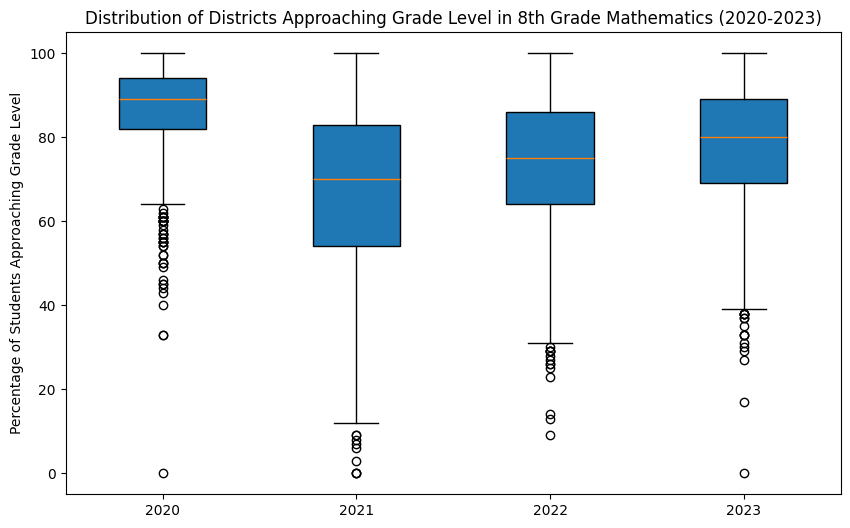

In [15]:
import matplotlib.pyplot as plt

# Store the filtered datasets for each year
filtered_data = {
    2020: df_2020_8th_math,
    2021: df_2021_8th_math,
    2022: df_2022_8th_math,
    2023: df_2023_8th_math
}

# Extract Approaches Grade Level data for each year
boxplot_data = [filtered_data[year].iloc[:, 1].dropna() for year in [2020, 2021, 2022, 2023]]

# Labels for each year
labels = ["2020", "2021", "2022", "2023"]

# Create the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_data, labels=labels, patch_artist=True)

# Set titles and labels
plt.ylabel("Percentage of Students Approaching Grade Level")
plt.title("Distribution of Districts Approaching Grade Level in 8th Grade Mathematics (2020-2023)")

# Show the plot
plt.show()


In [22]:
# Rename columns for easier reference
df_2023_8th_math = df_2023_8th_math.rename(columns={
    "District 2023 Domain 1A: Approaches Grade Level STD, Grade 8, All Students, STAAR Mathematics Rate": "Approaches",
    "District 2023 Domain 1A: Meets Grade Level STD, Grade 8, All Students, STAAR Mathematics Rate": "Meets",
    "District 2023 Domain 1A: Masters Grade Level STD, Grade 8, All Students, STAAR Mathematics Rate": "Masters"
})

# Compute the true (mutually exclusive) percentages
df_2023_8th_math["True Approaches"] = df_2023_8th_math["Approaches"] - df_2023_8th_math["Meets"]
df_2023_8th_math["True Meets"] = df_2023_8th_math["Meets"] - df_2023_8th_math["Masters"]
df_2023_8th_math["True Masters"] = df_2023_8th_math["Masters"]  # Masters stays the same

# Keep only relevant columns
df_2023_8th_math_transformed = df_2023_8th_math[["DISTRICT_id", "True Approaches", "True Meets", "True Masters"]]

# Display the first few rows of the transformed dataset
print(df_2023_8th_math_transformed.head())

# If you want to see all columns clearly
pd.set_option('display.max_columns', None)

# Display the first few rows of the original dataset
print("Original Dataset (Before Transformation):")
print(df_2023_8th_math.head())

# Ensure all columns are visible
pd.set_option('display.max_columns', None)




  DISTRICT_id  True Approaches  True Meets  True Masters
0     '001902             30.0        40.0          18.0
1     '001903             45.0        33.0           4.0
2     '001904             36.0        29.0           8.0
3     '001906             18.0        53.0          29.0
4     '001907             28.0        33.0          17.0
Original Dataset (Before Transformation):
  DISTRICT_id  Approaches  Meets  Masters  True Approaches  True Meets  \
0     '001902        88.0   58.0     18.0             30.0        40.0   
1     '001903        82.0   37.0      4.0             45.0        33.0   
2     '001904        73.0   37.0      8.0             36.0        29.0   
3     '001906       100.0   82.0     29.0             18.0        53.0   
4     '001907        78.0   50.0     17.0             28.0        33.0   

   True Masters  
0          18.0  
1           4.0  
2           8.0  
3          29.0  
4          17.0  


In [23]:
# Add a "Did Not Meet" column
df_2023_8th_math_transformed["Did Not Meet"] = 100 - (
    df_2023_8th_math_transformed["True Approaches"] +
    df_2023_8th_math_transformed["True Meets"] +
    df_2023_8th_math_transformed["True Masters"]
)

# Add a "Met or Mastered" column
df_2023_8th_math_transformed["Met or Mastered"] = (
    df_2023_8th_math_transformed["True Meets"] +
    df_2023_8th_math_transformed["True Masters"]
)

# Display the first few rows of the transformed dataset
print(df_2023_8th_math_transformed.head())

# If you want to see all columns clearly
pd.set_option('display.max_columns', None)

  DISTRICT_id  True Approaches  True Meets  True Masters  Did Not Meet  \
0     '001902             30.0        40.0          18.0          12.0   
1     '001903             45.0        33.0           4.0          18.0   
2     '001904             36.0        29.0           8.0          27.0   
3     '001906             18.0        53.0          29.0           0.0   
4     '001907             28.0        33.0          17.0          22.0   

   Met or Mastered  
0             58.0  
1             37.0  
2             37.0  
3             82.0  
4             50.0  


/var/folders/xb/7bby7khj7674pdrsp1bs67w40000gn/T/ipykernel_38053/1183636746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023_8th_math_transformed["Did Not Meet"] = 100 - (
/var/folders/xb/7bby7khj7674pdrsp1bs67w40000gn/T/ipykernel_38053/1183636746.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023_8th_math_transformed["Met or Mastered"] = (


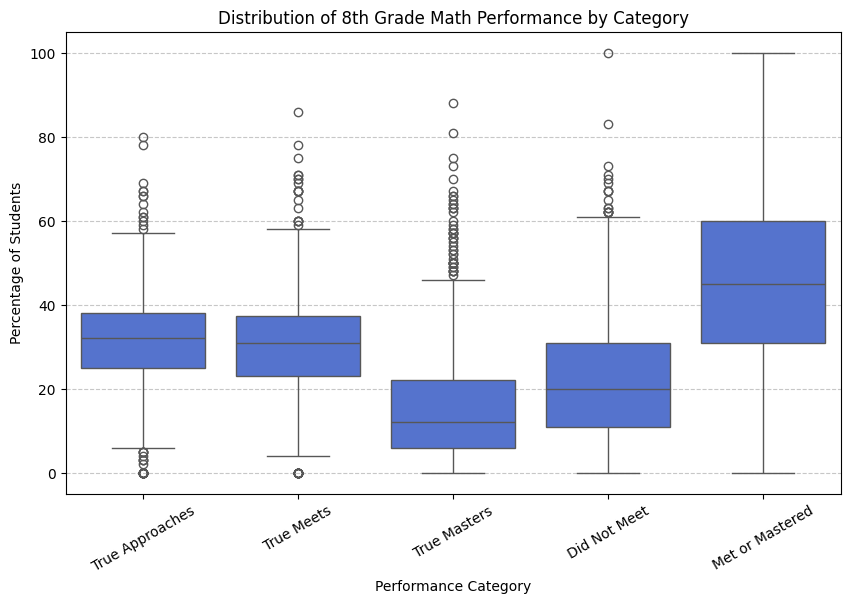

In [30]:
# Reshape the dataframe to long format for easier plotting
df_melted = df_2023_8th_math_transformed.melt(
    id_vars=["DISTRICT_id"], 
    value_vars=["True Approaches", "True Meets", "True Masters", "Did Not Meet", "Met or Mastered"],
    var_name="Category", 
    value_name="Percentage"
)

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Category", y="Percentage", data=df_melted, color="royalblue")

# Customize the plot
plt.title("Distribution of 8th Grade Math Performance by Category")
plt.xlabel("Performance Category")
plt.ylabel("Percentage of Students")
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


In [146]:
import geopandas as gpd

# Define the base path where your data is stored
base_path = r"/Users/everettadkins/Documents/Senior Spring/DSCI Capstone/Data"

# Construct the full file path
geojson_filename = "Texas_SchoolDistricts_2024.geojson"
geojson_path = os.path.join(base_path, geojson_filename)

# Load Texas school districts GeoJSON file
gdf_districts = gpd.read_file(geojson_path)

# Check if the file loaded correctly
print(gdf_districts.head())


   FID  GEOID20                                         NAME20  SDLEA  \
0    1  4838490        Sabine Pass Independent School District  38490   
1    2  4811040         Boys Ranch Independent School District  11040   
2    3  4821300              Grady Independent School District  21300   
3    4  4845420            Wheeler Independent School District  45420   
4    5  4821560  Grandview-Hopkins Independent School District  21560   

                    NAME              NAME2  DISTRICT_N DISTRICT DISTRICT_C  \
0        Sabine Pass ISD        Sabine Pass      123913  123-913     123913   
1         Boys Ranch ISD         Boys Ranch      180901  180-901     180901   
2              Grady ISD              Grady      156905  156-905     156905   
3            Wheeler ISD            Wheeler      242903  242-903     242903   
4  Grandview-Hopkins ISD  Grandview-Hopkins       90905  090-905     090905   

  NCES_DISTR  COLOR   Shape__Area  Shape__Length  \
0    4838490      7  9.863762e+08 

In [147]:
# Check available column names
print("GeoDataFrame Columns:", gdf_districts.columns)

# Rename the district ID column if needed
gdf_districts = gdf_districts.rename(columns={"DISTRICT_N": "DISTRICT_id"})

# Verify rename worked
print("Updated GeoDataFrame Columns:", gdf_districts.columns)


GeoDataFrame Columns: Index(['FID', 'GEOID20', 'NAME20', 'SDLEA', 'NAME', 'NAME2', 'DISTRICT_N',
       'DISTRICT', 'DISTRICT_C', 'NCES_DISTR', 'COLOR', 'Shape__Area',
       'Shape__Length', 'geometry'],
      dtype='object')
Updated GeoDataFrame Columns: Index(['FID', 'GEOID20', 'NAME20', 'SDLEA', 'NAME', 'NAME2', 'DISTRICT_id',
       'DISTRICT', 'DISTRICT_C', 'NCES_DISTR', 'COLOR', 'Shape__Area',
       'Shape__Length', 'geometry'],
      dtype='object')


In [148]:
# Ensure df_2023_8th_math_transformed exists before running this
df_map_data = df_2023_8th_math_transformed[["DISTRICT_id", "Met or Mastered"]].copy()

# Ensure column names match and convert to the same type
df_map_data["DISTRICT_id"] = df_map_data["DISTRICT_id"].astype(str)
gdf_districts["DISTRICT_id"] = gdf_districts["DISTRICT_id"].astype(str)

# Merge the GeoDataFrame with the district performance data
gdf_merged = gdf_districts.merge(df_map_data, on="DISTRICT_id", how="left")

# Confirm merge success
print("Merge successful! First few rows:")
print(gdf_merged.head())

Merge successful! First few rows:
   FID  GEOID20                                         NAME20  SDLEA  \
0    1  4838490        Sabine Pass Independent School District  38490   
1    2  4811040         Boys Ranch Independent School District  11040   
2    3  4821300              Grady Independent School District  21300   
3    4  4845420            Wheeler Independent School District  45420   
4    5  4821560  Grandview-Hopkins Independent School District  21560   

                    NAME              NAME2 DISTRICT_id DISTRICT DISTRICT_C  \
0        Sabine Pass ISD        Sabine Pass      123913  123-913     123913   
1         Boys Ranch ISD         Boys Ranch      180901  180-901     180901   
2              Grady ISD              Grady      156905  156-905     156905   
3            Wheeler ISD            Wheeler      242903  242-903     242903   
4  Grandview-Hopkins ISD  Grandview-Hopkins       90905  090-905     090905   

  NCES_DISTR  COLOR   Shape__Area  Shape__Length  \


In [149]:
df_map_data["DISTRICT_id"] = df_map_data["DISTRICT_id"].str.replace("'", "").str.strip()

df_map_data["DISTRICT_id"] = df_map_data["DISTRICT_id"].str.zfill(6)
gdf_districts["DISTRICT_id"] = gdf_districts["DISTRICT_id"].str.zfill(6)

matched_ids = set(gdf_districts["DISTRICT_id"]).intersection(set(df_map_data["DISTRICT_id"]))
print(f"Number of matched IDs: {len(matched_ids)}")

Number of matched IDs: 1017


In [164]:
gdf_merged_debug["Met or Mastered"] = gdf_merged_debug["Met or Mastered"].fillna(0)


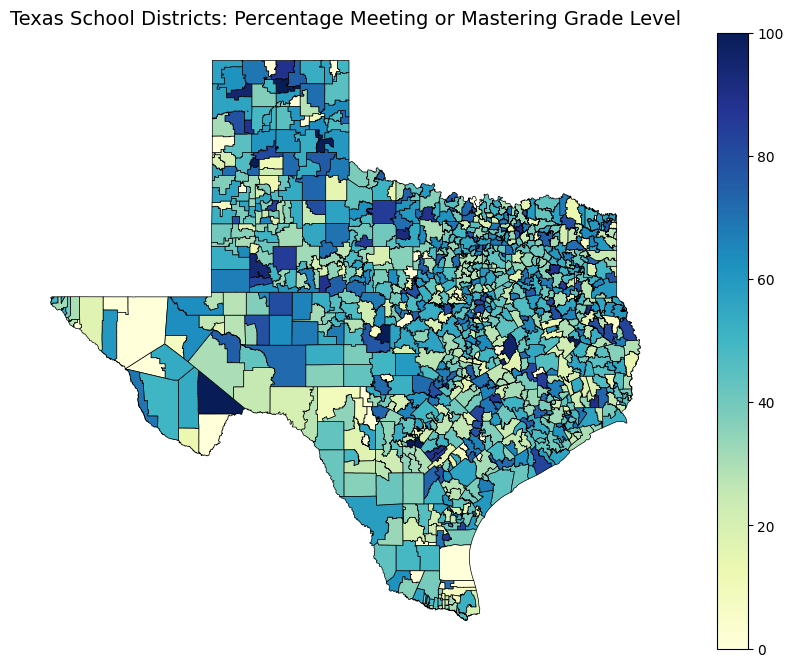

In [165]:
import matplotlib.pyplot as plt

# Create a static map
fig, ax = plt.subplots(figsize=(12, 8))

gdf_merged_debug.plot(
    column="Met or Mastered",
    cmap="YlGnBu",
    linewidth=0.5,
    edgecolor="black",
    legend=True,
    ax=ax
)

ax.set_title("Texas School Districts: Percentage Meeting or Mastering Grade Level", fontsize=14)
ax.axis("off")

plt.show()
